In [2]:
import scipy.stats as stats
import pandas as pd
import urllib
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import warnings
warnings.filterwarnings("ignore")

In [3]:
import matplotlib
from matplotlib import font_manager, rc
import platform

matplotlib.rcParams['axes.unicode_minus'] = False

font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [4]:
df = pd.read_csv('./2차전처리데이터.csv',encoding='cp949')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57570 entries, 0 to 57569
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   요일          57570 non-null  object
 1   주야          57570 non-null  object
 2   사고내용        57570 non-null  object
 3   사고유형        57570 non-null  object
 4   가해자성별       57570 non-null  object
 5   피해자성별       57570 non-null  object
 6   연령가해자       57570 non-null  object
 7   가해자음주       57570 non-null  object
 8   법규위반가해자     57570 non-null  object
 9   행동유형가해자     57570 non-null  object
 10  신체상해정도가해자   57570 non-null  object
 11  신체상해정도피해자   57570 non-null  object
 12  가해자신체상해주부위  57570 non-null  object
 13  피해자신체상해주부위  57570 non-null  object
 14  당사자종별가해자    57570 non-null  object
 15  차량용도가해자     57570 non-null  object
 16  도로종류        57570 non-null  object
 17  도로형태        57570 non-null  object
 18  노인보호구역_여부   57570 non-null  object
 19  어린이보호구역_여부  57570 non-null  object
 20  도로선형  

 # 첫 번째 괄호는 유의수준 0.05로 기각 / 두 번째 괄호는 유의수준 0.01로 기각

## 요일 (X) / (X)

In [6]:
model = ols('사고심각도 ~ C(요일)', df).fit()
anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
C(요일),6.0,5.237630e+04,8729.382854,1.910685,0.075069
Residual,57563.0,2.629891e+08,4568.717888,NaN,NaN


---

## 주야 (O) / (O)

In [7]:
model = ols('사고심각도 ~ C(주야)', df).fit()
anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
C(주야),1.0,3.517933e+06,3.517933e+06,780.35446,1.394949e-170
Residual,57568.0,2.595236e+08,4.508122e+03,NaN,NaN


In [8]:
posthoc = pairwise_tukeyhsd(df['사고심각도'], df['주야'], alpha=0.05)
print(posthoc)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj  lower    upper   reject
-----------------------------------------------------
     야      주  -17.133 0.001 -18.3351 -15.9309   True
-----------------------------------------------------


---

## 사고유형 (O) / (O)

In [9]:
model = ols('사고심각도 ~ C(사고유형)', df).fit()
anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
C(사고유형),2.0,2.831114e+06,1.415557e+06,313.167213,5.342782e-136
Residual,57567.0,2.602104e+08,4.520131e+03,NaN,NaN


In [10]:
posthoc = pairwise_tukeyhsd(df['사고심각도'], df['사고유형'], alpha=0.05)
print(posthoc)

   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
   group1   group2 meandiff p-adj   lower   upper  reject
---------------------------------------------------------
보도_길가장자리_기타  차도통행중  11.2364  0.001  8.9213 13.5516   True
보도_길가장자리_기타    횡단중  14.6519  0.001 13.2648  16.039   True
      차도통행중    횡단중   3.4155 0.0014  1.1278  5.7033   True
---------------------------------------------------------


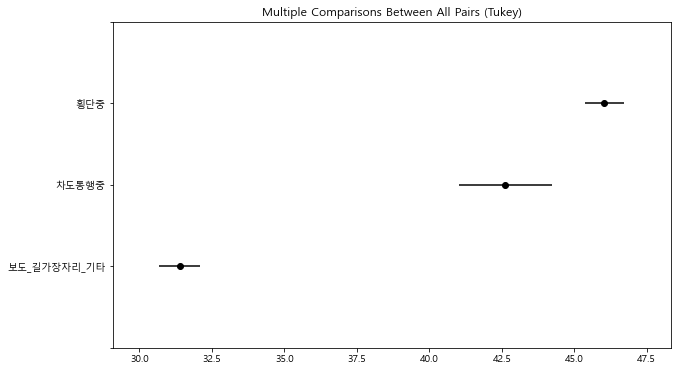

In [11]:
fig = posthoc.plot_simultaneous()

---

## 가해자성별 (O) / (O)

In [12]:
model = ols('사고심각도 ~ C(가해자성별)', df).fit()
anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
C(가해자성별),2.0,2.080098e+06,1.040049e+06,229.430484,5.683571e-100
Residual,57567.0,2.609614e+08,4.533177e+03,NaN,NaN


In [13]:
posthoc = pairwise_tukeyhsd(df['사고심각도'], df['가해자성별'], alpha=0.05)
print(posthoc)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj  lower    upper  reject
----------------------------------------------------
  기타불명      남  31.6878 0.001  27.6357 35.7399   True
  기타불명      여  23.1193 0.001  18.9045 27.3341   True
     남      여  -8.5685 0.001 -10.1503 -6.9866   True
----------------------------------------------------


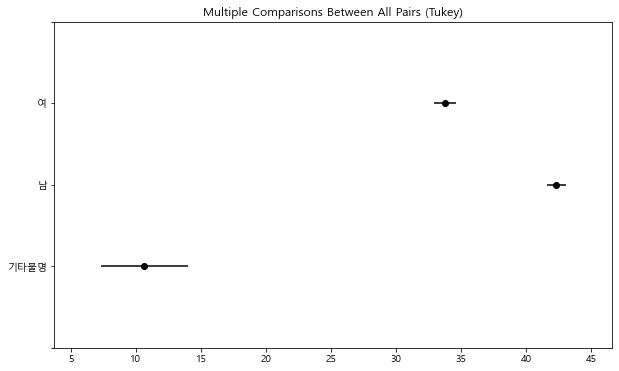

In [14]:
fig = posthoc.plot_simultaneous()

---

## 피해자성별 (X) / (X)

In [15]:
model = ols('사고심각도 ~ C(피해자성별)', df).fit()
anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
C(피해자성별),1.0,5.415440e+02,541.543980,0.11852,0.730647
Residual,57568.0,2.630409e+08,4569.221486,NaN,NaN


---

## 연령가해자 (O) / (O)

In [16]:
model = ols('사고심각도 ~ C(연령가해자)', df).fit()
anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
C(연령가해자),6.0,1.131853e+06,188642.214559,41.460147,9.781427e-51
Residual,57563.0,2.619096e+08,4549.964922,NaN,NaN


In [17]:
posthoc = pairwise_tukeyhsd(df['사고심각도'], df['연령가해자'], alpha=0.05)
print(posthoc)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
 20세이하 21-30세   18.852  0.001 14.2807 23.4233   True
 20세이하 31-40세  19.2903  0.001 15.0615 23.5191   True
 20세이하 41-50세  19.8305  0.001 15.7742 23.8869   True
 20세이하 51-60세  20.2524  0.001  16.267 24.2379   True
 20세이하 61-64세  20.8893  0.001 16.2525 25.5261   True
 20세이하  65세이상  20.0477  0.001 15.7783  24.317   True
21-30세 31-40세   0.4383    0.9 -3.0506  3.9272  False
21-30세 41-50세   0.9785    0.9 -2.2991  4.2562  False
21-30세 51-60세   1.4004 0.8383  -1.789  4.5899  False
21-30세 61-64세   2.0373 0.7106 -1.9362  6.0108  False
21-30세  65세이상   1.1957    0.9 -2.3422  4.7335  False
31-40세 41-50세   0.5402    0.9 -2.2398  3.3203  False
31-40세 51-60세   0.9621    0.9 -1.7134  3.6377  False
31-40세 61-64세    1.599 0.8239 -1.9752  5.1732  False
31-40세  65세이상   0.7574    0.9 -2.3252  3.8399  False
41-50세 51-60세   0.4219    0.9 -1.9717  2.8155 

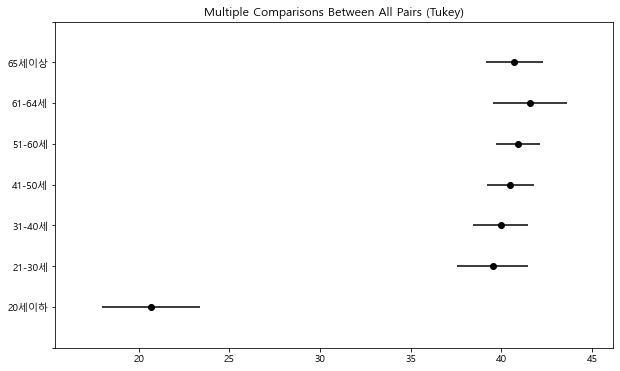

In [18]:
fig = posthoc.plot_simultaneous()

---

## 가해자음주 (O) / (O)

In [19]:
model = ols('사고심각도 ~ C(가해자음주)', df).fit()
anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
C(가해자음주),2.0,6.098125e+05,304906.272613,66.884227,9.688266e-30
Residual,57567.0,2.624317e+08,4558.717173,NaN,NaN


In [20]:
posthoc = pairwise_tukeyhsd(df['사고심각도'], df['가해자음주'], alpha=0.05)
print(posthoc)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj  lower    upper   reject
-----------------------------------------------------
    기타   음주운전  22.3677 0.001  17.5546  27.1808   True
    기타  해당 없음   2.9573 0.001   1.6011   4.3134   True
  음주운전  해당 없음 -19.4104 0.001 -24.2593 -14.5616   True
-----------------------------------------------------


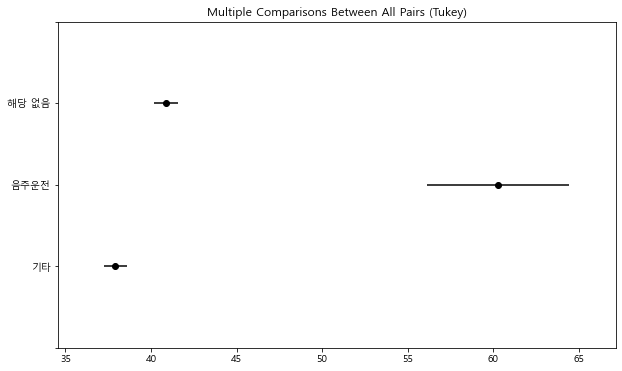

In [21]:
fig = posthoc.plot_simultaneous()

---

## 법규위반가해자 (O) / (O)

In [67]:
model = ols('사고심각도 ~ C(법규위반가해자)', df).fit()
anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
C(법규위반가해자),7.0,9.229609e+06,1.318516e+06,299.026188,0.0
Residual,57562.0,2.538119e+08,4.409365e+03,NaN,NaN


In [23]:
posthoc = pairwise_tukeyhsd(df['사고심각도'], df['법규위반가해자'], alpha=0.05)
print(posthoc)

        Multiple Comparison of Means - Tukey HSD, FWER=0.05        
   group1      group2    meandiff p-adj    lower     upper   reject
-------------------------------------------------------------------
         과속 교차로 통행방법 위반  -167.882  0.001 -182.0872 -153.6769   True
         과속          기타 -168.1316  0.001 -179.4621 -156.8011   True
         과속 보행자 보호의무 위반 -157.4664  0.001 -168.3649  -146.568   True
         과속        신호위반 -154.7323  0.001 -166.0327 -143.4318   True
         과속    안전거리 미확보 -151.5835  0.001 -176.4924 -126.6745   True
         과속 안전운전 의무 불이행 -153.9485  0.001 -164.6762 -143.2208   True
         과속      중앙선 침범 -145.3702  0.001 -158.4684 -132.2719   True
교차로 통행방법 위반          기타   -0.2495    0.9  -10.3467    9.8477  False
교차로 통행방법 위반 보행자 보호의무 위반   10.4156 0.0228    0.8058   20.0254   True
교차로 통행방법 위반        신호위반   13.1498 0.0019    3.0863   23.2132   True
교차로 통행방법 위반    안전거리 미확보   16.2986 0.4655   -8.0741   40.6713  False
교차로 통행방법 위반 안전운전 의무 불이행   13.9336  0.001    4.51

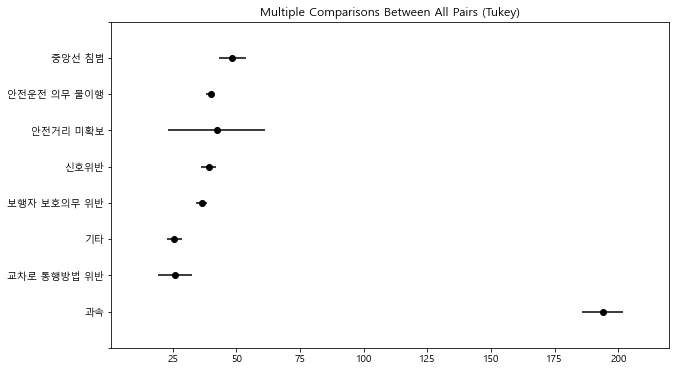

In [24]:
fig = posthoc.plot_simultaneous()

---

## 행동유형가해자 (O) / (O)

In [25]:
model = ols('사고심각도 ~ C(행동유형가해자)', df).fit()
anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
C(행동유형가해자),9.0,5.444468e+06,604940.898539,135.173919,1.693458e-253
Residual,57560.0,2.575970e+08,4475.278249,NaN,NaN


In [26]:
posthoc = pairwise_tukeyhsd(df['사고심각도'], df['행동유형가해자'], alpha=0.05)
print(posthoc)

  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
 group1  group2 meandiff p-adj   lower    upper   reject
--------------------------------------------------------
   U턴 중   기타/불명 -16.2858  0.001 -26.9881  -5.5835   True
   U턴 중  앞지르기 중  14.9119 0.7449  -12.204  42.0278  False
   U턴 중  좌우회전 중   -0.162    0.9 -10.0656   9.7416  False
   U턴 중    주정차중 -12.5591 0.0437 -24.9421   -0.176   True
   U턴 중 주행 중 대기 -15.9769 0.2074   -35.26   3.3063  False
   U턴 중    직진 중  15.3383  0.001    5.503  25.1737   True
   U턴 중  진로변경 중  24.5856 0.0042   4.5321  44.6391   True
   U턴 중    출발 중   1.2342    0.9 -11.6231  14.0914  False
   U턴 중    후진 중  -4.4176    0.9 -14.6077   5.7725  False
  기타/불명  앞지르기 중  31.1976 0.0047    5.523  56.8722   True
  기타/불명  좌우회전 중  16.1238  0.001   11.434  20.8136   True
  기타/불명    주정차중   3.7267    0.9  -5.0627  12.5161  False
  기타/불명 주행 중 대기   0.3089    0.9 -16.8885  17.5063  False
  기타/불명    직진 중  31.6241  0.001  27.0803  36.1679   True
  기타/불명  진로변경 중  40.8714  0.001

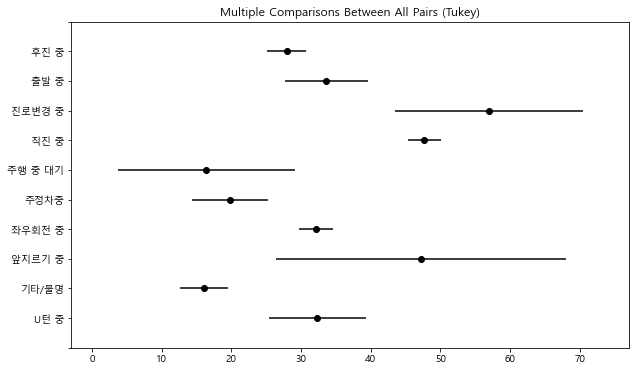

In [27]:
fig = posthoc.plot_simultaneous()

---

## 신체상해정도가해자 (O) / (O)

In [28]:
model = ols('사고심각도 ~ C(신체상해정도가해자)', df).fit()
anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
C(신체상해정도가해자),5.0,2.287351e+06,457470.292261,100.990997,2.019130e-106
Residual,57564.0,2.607541e+08,4529.812602,NaN,NaN


In [29]:
posthoc = pairwise_tukeyhsd(df['사고심각도'], df['신체상해정도가해자'], alpha=0.05)
print(posthoc)

   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1 group2  meandiff p-adj    lower     upper   reject
---------------------------------------------------------
    경상   기타불명  -28.2535  0.001  -39.2897  -17.2172   True
    경상   부상신고  -14.4429 0.1672  -31.8143    2.9285  False
    경상     사망  355.5958  0.001  269.1862  442.0055   True
    경상   상해없음   -6.2966 0.5201  -16.7771     4.184  False
    경상     중상   39.6385  0.001   19.3728   59.9041   True
  기타불명   부상신고   13.8106 0.0665   -0.5157   28.1368  False
  기타불명     사망  383.8493  0.001     298.0  469.6986   True
  기타불명   상해없음   21.9569  0.001   18.3075   25.6064   True
  기타불명     중상    67.892  0.001    50.167   85.6169   True
  부상신고     사망  370.0387  0.001  283.1476  456.9299   True
  부상신고   상해없음    8.1463 0.5445   -5.7564    22.049  False
  부상신고     중상   54.0814  0.001   31.8521   76.3106   True
    사망   상해없음 -361.8924  0.001 -447.6721 -276.1128   True
    사망     중상 -315.9574  0.001 -403.4731 -228.4416   True
  상해없음     중상 

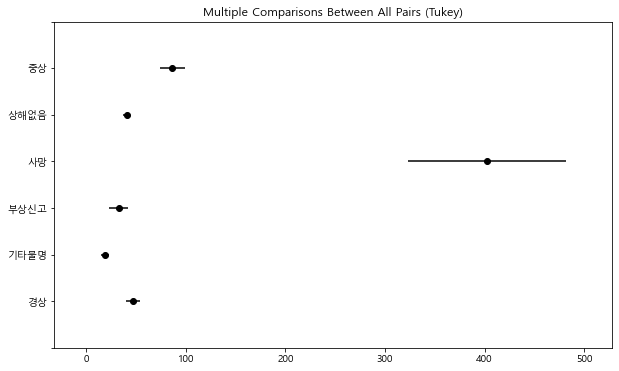

In [30]:
fig = posthoc.plot_simultaneous()

---

## 신체상해정도피해자 (O) / (O)

In [31]:
model = ols('사고심각도 ~ C(신체상해정도피해자)', df).fit()
anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
C(신체상해정도피해자),5.0,2.577266e+08,5.154533e+07,558277.120561,0.0
Residual,57564.0,5.314843e+06,9.232929e+01,NaN,NaN


In [32]:
posthoc = pairwise_tukeyhsd(df['사고심각도'], df['신체상해정도피해자'], alpha=0.05)
print(posthoc)

   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1 group2  meandiff p-adj    lower     upper   reject
---------------------------------------------------------
    경상   기타불명   -0.3301    0.9  -19.6938   19.0337  False
    경상   부상신고   -0.9757  0.001   -1.6439   -0.3076   True
    경상     사망  273.8659  0.001  273.3904  274.3414   True
    경상   상해없음   10.4495  0.001    8.0109   12.8881   True
    경상     중상   30.1704  0.001    29.916   30.4249   True
  기타불명   부상신고   -0.6457    0.9  -20.0187   18.7274  False
  기타불명     사망   274.196  0.001  254.8286  293.5633   True
  기타불명   상해없음   10.7795 0.5998   -8.7349    30.294  False
  기타불명     중상   30.5005  0.001   11.1373   49.8636   True
  부상신고     사망  274.8417  0.001  274.0753   275.608   True
  부상신고   상해없음   11.4252  0.001    8.9136   13.9367   True
  부상신고     중상   31.1461  0.001   30.4935   31.7987   True
    사망   상해없음 -263.4165  0.001 -265.8838 -260.9492   True
    사망     중상 -243.6955  0.001 -244.1489 -243.2421   True
  상해없음     중상 

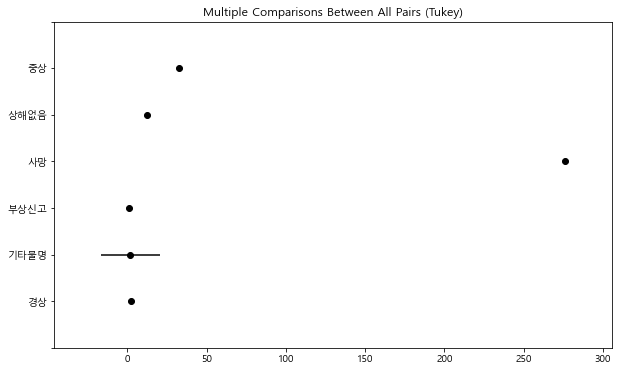

In [33]:
fig = posthoc.plot_simultaneous()

---

## 가해자신체상해주부위 (O) / (O)

In [34]:
model = ols('사고심각도 ~ C(가해자신체상해주부위)', df).fit()
anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
C(가해자신체상해주부위),17.0,3.356868e+05,19746.283355,4.325897,5.333828e-09
Residual,57552.0,2.627058e+08,4564.668426,NaN,NaN


In [35]:
posthoc = pairwise_tukeyhsd(df['사고심각도'], df['가해자신체상해주부위'], alpha=0.05)
print(posthoc)

  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1 group2  meandiff p-adj    lower    upper   reject
--------------------------------------------------------
    가슴     기타  -38.1187 0.0531   -76.437   0.1996  False
    가슴    대퇴부  -55.6311 0.0888 -114.4316   3.1694  False
    가슴     뒷목   33.3798    0.9  -45.9067 112.6663  False
    가슴      등  -51.7111    0.9 -290.0422   186.62  False
    가슴     머리   -7.5683    0.9  -64.3076  49.1711  False
    가슴      목  -30.7699    0.9  -97.8778  36.3379  False
    가슴      발  -57.2272 0.0314 -112.2481  -2.2063   True
    가슴     불명  -64.7944 0.2245 -141.3803  11.7914  False
    가슴   상해없음  -46.3251  0.001   -81.479 -11.1712   True
    가슴      손  -23.6585    0.9  -88.1518  40.8349  False
    가슴     앞목   13.0032    0.9  -82.7723 108.7787  False
    가슴     어깨   -33.788 0.8334   -91.857   24.281  False
    가슴     얼굴   -16.918    0.9  -63.7461  29.9101  False
    가슴     없음  -74.0444    0.9 -214.6044  66.5156  False
    가슴      팔  -51.3611 0.0486 

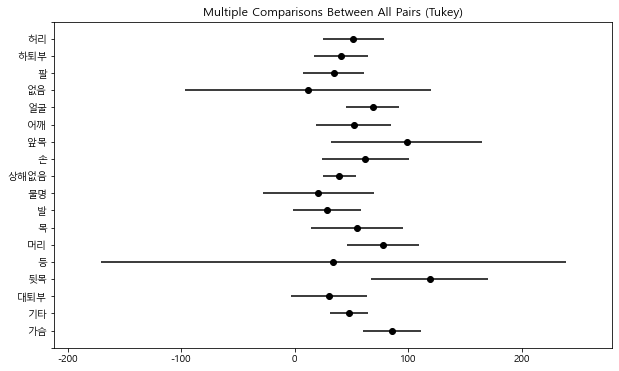

In [36]:
fig = posthoc.plot_simultaneous()

---

## 피해자신체상해주부위 (O) / (O)

In [63]:
model = ols('사고심각도 ~ C(피해자신체상해주부위)', df).fit()
anova_lm(model)


,df,sum_sq,mean_sq,F,PR(>F)
C(피해자신체상해주부위),16.0,2.897181e+07,1.810738e+06,445.223929,0.0
Residual,57553.0,2.340697e+08,4.067028e+03,NaN,NaN


In [38]:
posthoc = pairwise_tukeyhsd(df['사고심각도'], df['피해자신체상해주부위'], alpha=0.05)
print(posthoc)

  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1 group2  meandiff p-adj    lower    upper   reject
--------------------------------------------------------
    가슴     기타  -19.9785  0.001  -24.2169 -15.7402   True
    가슴    대퇴부  -21.0041  0.001  -26.0433  -15.965   True
    가슴     뒷목  -35.0982  0.001  -42.6282 -27.5681   True
    가슴      등  -26.5884  0.001   -38.416 -14.7607   True
    가슴     머리   34.9474  0.001   30.3123  39.5826   True
    가슴      목  -31.0008  0.001  -40.3111 -21.6905   True
    가슴      발  -33.5157  0.001  -38.2821 -28.7493   True
    가슴      배    58.433  0.001   44.6093  72.2567   True
    가슴   상해없음  -44.4928  0.001  -64.2749 -24.7106   True
    가슴      손  -37.0678  0.001  -45.2012 -28.9343   True
    가슴     앞목   -26.287  0.001  -45.1127  -7.4612   True
    가슴     어깨  -36.5543  0.001  -42.8434 -30.2652   True
    가슴     얼굴    0.8117    0.9   -5.0034   6.6267  False
    가슴      팔  -39.4592  0.001  -45.2218 -33.6966   True
    가슴    하퇴부  -29.0393  0.001 

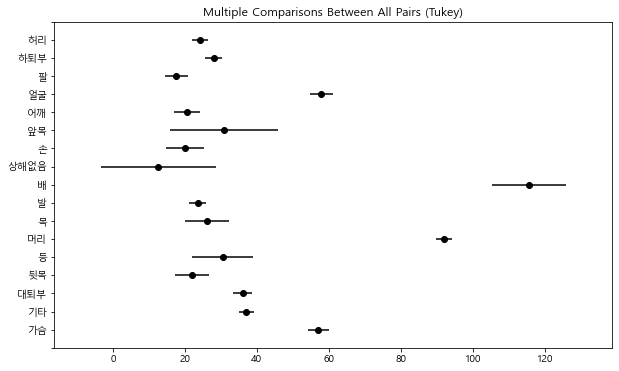

In [39]:
fig = posthoc.plot_simultaneous()

---

## 당사자종별가해자 (O) / (O)

In [40]:
model = ols('사고심각도 ~ C(당사자종별가해자)', df).fit()
anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
C(당사자종별가해자),17.0,3.975239e+06,233837.581374,51.94741,2.191976e-175
Residual,57552.0,2.590662e+08,4501.429059,NaN,NaN


In [41]:
posthoc = pairwise_tukeyhsd(df['사고심각도'], df['당사자종별가해자'], alpha=0.05)
print(posthoc)

       Multiple Comparison of Means - Tukey HSD, FWER=0.05       
   group1      group2   meandiff p-adj    lower    upper   reject
-----------------------------------------------------------------
개인형이동수단(PM)        건설기계  67.3116  0.001   31.4149 103.2082   True
개인형이동수단(PM)          경형  25.6287 0.4763   -9.1038  60.3612  False
개인형이동수단(PM)          기타   3.7508    0.9   -47.203  54.7047  False
개인형이동수단(PM)         농기계  28.5892 0.7442  -17.4543  74.6327  False
개인형이동수단(PM)          대형  31.3955 0.1382   -3.4476  66.2386  False
개인형이동수단(PM)          불명  -3.8234    0.9    -38.95  31.3033  False
개인형이동수단(PM) 사륜오토바이(ATV)  16.1739    0.9  -36.7687  69.1165  False
개인형이동수단(PM)         사발이   6.2124    0.9  -67.3158  79.7406  False
개인형이동수단(PM)          소형  30.5129 0.1672   -4.1314  65.1572  False
개인형이동수단(PM)         승용차  23.3992 0.6157  -11.1527  57.9511  False
개인형이동수단(PM)         승합차  22.7111 0.6691  -12.0261  57.4483  False
개인형이동수단(PM)    원동기장치자전거  14.3927    0.9  -21.0708  49.8562  False
개인형이동수단(PM

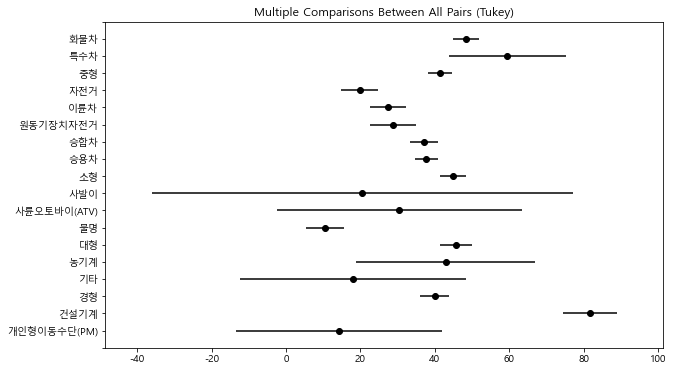

In [42]:
fig = posthoc.plot_simultaneous()

---

## 차량용도가해자 (O) / (O)

In [43]:
model = ols('사고심각도 ~ C(차량용도가해자)', df).fit()
anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
C(차량용도가해자),29.0,4.638457e+06,159946.802132,35.61622,7.502100e-197
Residual,57540.0,2.584030e+08,4490.841620,NaN,NaN


In [44]:
posthoc = pairwise_tukeyhsd(df['사고심각도'], df['차량용도가해자'], alpha=0.05)
print(posthoc)

       Multiple Comparison of Means - Tukey HSD, FWER=0.05       
   group1      group2   meandiff p-adj    lower    upper   reject
-----------------------------------------------------------------
       개별화물        개인택시 -24.9224  0.001   -44.042  -5.8029   True
       개별화물 개인형이동수단(PM) -50.2335 0.0019  -91.4525  -9.0145   True
       개별화물        고속버스 -31.1732 0.5478  -73.1419  10.7954  False
       개별화물          기타  -24.485 0.0172  -47.1873  -1.7826   True
       개별화물     기타/건설기계  -2.8112    0.9  -22.6751  17.0528  False
       개별화물       기타/불명 -52.6709  0.001  -74.1686 -31.1733   True
       개별화물         농기계 -16.1542    0.9    -61.24  28.9316  False
       개별화물        덤프트럭   4.6953    0.9  -34.8584   44.249  False
       개별화물         렌터카 -27.5751  0.001  -46.7539  -8.3963   True
       개별화물        마을버스 -35.4827  0.001  -58.3124  -12.653   True
       개별화물          버스 -16.9069 0.3299  -37.5188   3.7051  False
       개별화물        법인택시 -28.2029  0.001  -46.9984  -9.4075   True
       개별화

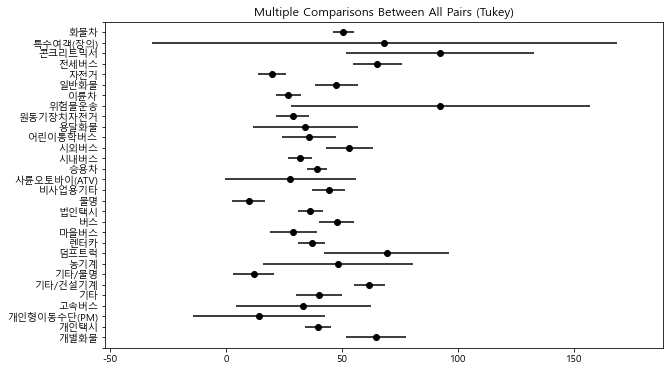

In [45]:
fig = posthoc.plot_simultaneous()

---

## 도로종류 (O) / (O)

In [46]:
model = ols('사고심각도 ~ C(도로종류)', df).fit()
anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
C(도로종류),6.0,6.091310e+06,1.015218e+06,227.433244,3.066452e-288
Residual,57563.0,2.569502e+08,4.463808e+03,NaN,NaN


In [47]:
posthoc = pairwise_tukeyhsd(df['사고심각도'], df['도로종류'], alpha=0.05)
print(posthoc)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj   lower    upper   reject
------------------------------------------------------
  고속국도     군도 -44.2952  0.001 -68.8191 -19.7714   True
  고속국도     기타 -61.5322  0.001 -85.9223 -37.1421   True
  고속국도     시도 -49.7398  0.001 -74.0304 -25.4491   True
  고속국도   일반국도 -16.7187 0.4103 -41.2419   7.8044  False
  고속국도    지방도 -33.2716 0.0012 -57.7225  -8.8206   True
  고속국도 특별광역시도 -55.8046  0.001 -80.0857 -31.5235   True
    군도     기타  -17.237  0.001 -21.7561 -12.7179   True
    군도     시도  -5.4445  0.001  -9.3919  -1.4971   True
    군도   일반국도  27.5765  0.001  22.3872  32.7658   True
    군도    지방도  11.0237  0.001   6.1869  15.8605   True
    군도 특별광역시도 -11.5094  0.001 -15.3974  -7.6213   True
    기타     시도  11.7925  0.001   8.7861  14.7988   True
    기타   일반국도  44.8135  0.001  40.2986  49.3284   True
    기타    지방도  28.2607  0.001  24.1557  32.3656   True
    기타 특별광역시도   5.7276  0.001   2.7996   8.6556   True
    시도   일

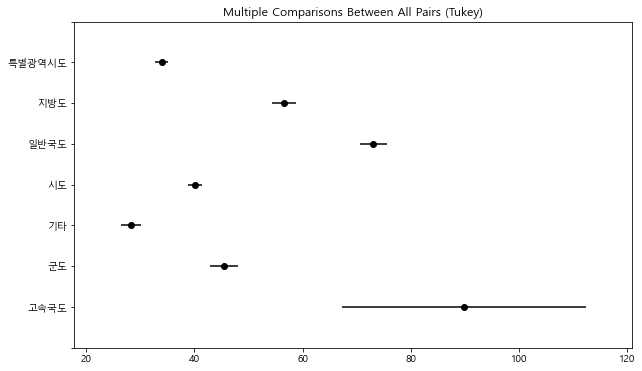

In [48]:
fig = posthoc.plot_simultaneous()

---

## 도로형태 (O) / (O)

In [49]:
model = ols('사고심각도 ~ C(도로형태)', df).fit()
anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
C(도로형태),11.0,5.584532e+05,50768.473807,11.13265,6.132646e-21
Residual,57558.0,2.624830e+08,4560.322299,NaN,NaN


In [50]:
posthoc = pairwise_tukeyhsd(df['사고심각도'], df['도로형태'], alpha=0.05)
print(posthoc)

    Multiple Comparison of Means - Tukey HSD, FWER=0.05     
  group1    group2  meandiff p-adj   lower    upper   reject
------------------------------------------------------------
    고가도로위       교량위    24.73 0.6917 -16.4536  65.9137  False
    고가도로위      교차로내  -0.8531    0.9    -37.7  35.9938  False
    고가도로위     교차로부근  -0.4687    0.9 -37.3447  36.4073  False
    고가도로위  교차로횡단보도내  -1.9089    0.9 -38.8581  35.0404  False
    고가도로위     기타/불명  -9.7559    0.9 -46.7666  27.2547  False
    고가도로위     기타단일로  -0.1895    0.9 -36.9958  36.6168  False
    고가도로위       주차장 -19.0933    0.9  -57.497  19.3103  False
    고가도로위 지하차도(도로)내    5.701    0.9  -33.292   44.694  False
    고가도로위       터널안  15.0741    0.9 -41.1145  71.2626  False
    고가도로위    횡단보도부근    4.955    0.9 -33.5104  43.4204  False
    고가도로위     횡단보도상    4.254    0.9 -32.8687  41.3767  False
      교량위      교차로내 -25.5831  0.001 -44.2287  -6.9376   True
      교량위     교차로부근 -25.1987  0.001 -43.9018  -6.4956   True
      교량위  교차로횡단보도내 -26.

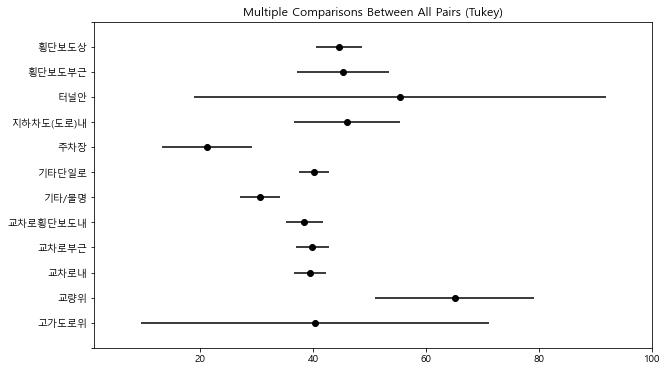

In [51]:
fig = posthoc.plot_simultaneous()

---

## 노인보호구역_여부 (O) / (X)

In [52]:
model = ols('사고심각도 ~ C(노인보호구역_여부)', df).fit()
anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
C(노인보호구역_여부),1.0,2.631270e+04,26312.704857,5.759249,0.016405
Residual,57568.0,2.630152e+08,4568.773822,NaN,NaN


In [55]:
posthoc = pairwise_tukeyhsd(df['사고심각도'], df['노인보호구역_여부'], alpha=0.05)
print(posthoc)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
   아니오      예  25.6569 0.0164 4.7023 46.6114   True
---------------------------------------------------


---

## 어린이보호구역_여부 (O) / (X)

In [64]:
model = ols('사고심각도 ~ C(어린이보호구역_여부)', df).fit()
anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
C(어린이보호구역_여부),1.0,2.992246e+04,29922.461404,6.549432,0.010494
Residual,57568.0,2.630116e+08,4568.711117,NaN,NaN


In [65]:
posthoc = pairwise_tukeyhsd(df['사고심각도'], df['어린이보호구역_여부'], alpha=0.05)
print(posthoc)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
   아니오      예 -11.9304 0.0105 -21.0675 -2.7933   True
-----------------------------------------------------


---

## 도로선형 (O) / (O)

In [68]:
model = ols('사고심각도 ~ C(도로선형)', df).fit()
anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
C(도로선형),3.0,8.228189e+05,274272.978814,60.212336,7.389910e-39
Residual,57566.0,2.622187e+08,4555.096153,NaN,NaN


In [70]:
posthoc = pairwise_tukeyhsd(df['사고심각도'], df['도로선형'], alpha=0.05)
print(posthoc)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1  group2 meandiff p-adj  lower    upper  reject
------------------------------------------------------
기타/서비스구역    내리막  22.2486 0.001  16.6152 27.8821   True
기타/서비스구역    오르막  22.4923 0.001  16.8031 28.1816   True
기타/서비스구역     평지   12.276 0.001   7.4299 17.1222   True
     내리막    오르막   0.2437   0.9  -4.0391  4.5265  False
     내리막     평지  -9.9726 0.001 -13.0484 -6.8968   True
     오르막     평지 -10.2163 0.001 -13.3931 -7.0395   True
------------------------------------------------------


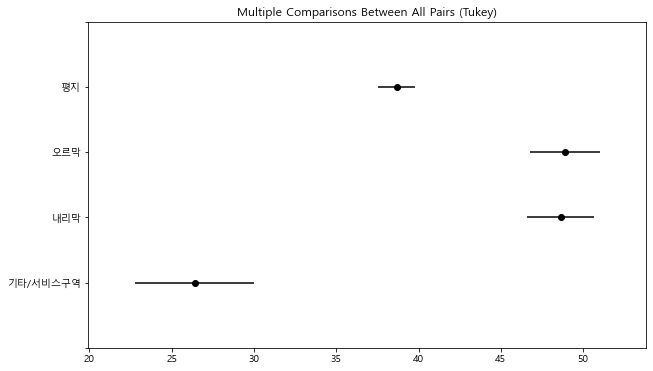

In [72]:
fig = posthoc.plot_simultaneous()

---

## 기상상태 (O) / (O)

In [74]:
model = ols('사고심각도 ~ C(기상상태)', df).fit()
anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
C(기상상태),4.0,1.757445e+06,439361.166448,96.798203,3.089494e-82
Residual,57565.0,2.612840e+08,4538.939276,NaN,NaN


In [75]:
posthoc = pairwise_tukeyhsd(df['사고심각도'], df['기상상태'], alpha=0.05)
print(posthoc)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj   lower    upper   reject
------------------------------------------------------
     눈     맑음 -10.7967 0.1536 -23.7526   2.1592  False
     눈      비  -1.7905    0.9 -15.0886  11.5076  False
     눈     안개  73.5972  0.001  50.9733  96.2211   True
     눈     흐림   9.2729 0.3328  -4.2425  22.7883  False
    맑음      비   9.0062  0.001   5.7978  12.2146   True
    맑음     안개  84.3939  0.001  65.8118  102.976   True
    맑음     흐림  20.0696  0.001  16.0547  24.0845   True
     비     안개  75.3877  0.001  56.5654    94.21   True
     비     흐림  11.0634  0.001    6.053  16.0737   True
    안개     흐림 -64.3243  0.001 -83.3007 -45.3479   True
------------------------------------------------------


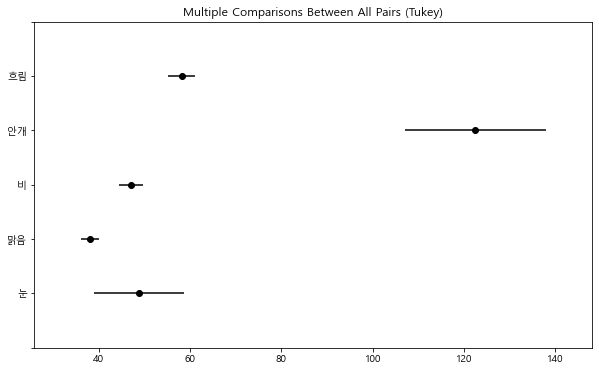

In [76]:
fig = posthoc.plot_simultaneous()

---

## 노면상태 (O) / (O)

In [78]:
model = ols('사고심각도 ~ C(노면상태)', df).fit()
anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
C(노면상태),4.0,6.836754e+05,170918.840047,37.502002,2.229793e-31
Residual,57565.0,2.623578e+08,4557.592438,NaN,NaN


In [79]:
posthoc = pairwise_tukeyhsd(df['사고심각도'], df['노면상태'], alpha=0.05)
print(posthoc)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
    건조     기타   3.2623 0.8651  -6.0856 12.6102  False
    건조  서리/결빙  12.8606 0.3155  -5.5726 31.2938  False
    건조     적설   1.1274    0.9 -18.4097 20.6645  False
    건조  젖음/습기  12.5009  0.001   9.6837 15.3181   True
    기타  서리/결빙   9.5983 0.6853 -11.0383 30.2349  False
    기타     적설  -2.1349    0.9 -23.7633 19.4934  False
    기타  젖음/습기   9.2385 0.0707   -0.458 18.9351  False
 서리/결빙     적설 -11.7333 0.7285 -38.5695  15.103  False
 서리/결빙  젖음/습기  -0.3598    0.9 -18.9722 18.2527  False
    적설  젖음/습기  11.3735 0.5119  -8.3328 31.0798  False
-----------------------------------------------------


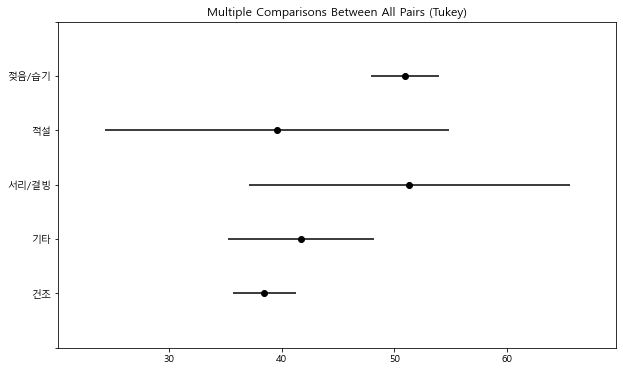

In [80]:
fig = posthoc.plot_simultaneous()

---

## 교차로형태 (X) / (X)

In [81]:
model = ols('사고심각도 ~ C(교차로형태)', df).fit()
anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
C(교차로형태),5.0,2.270325e+04,4540.649673,0.993762,0.419709
Residual,57564.0,2.630188e+08,4569.153999,NaN,NaN


---